# Border Screening for Varying Disease

----

This notebook is to be used to obtain detection rates from the BoarderScreening code. The data obtained is then to be used in the border screening paper, where it will be used to quantify the impact of using border screening as a risk reducing method during disease outbreaks.

Aside from assessing a range of diseases, we shall also be varying flight time to model situations where the outbreak has occured in countries of varying distance away from the destination country.

In [1]:
from boarder_screening import boarder_screening
import numpy.random as rand
import scipy.stats as stats
import pandas as pd
import numpy as np

In [2]:
flight_ranges = [(3,5), (9,11), (15,17)]

diseases =['Ebola', 'SARS', 'Influenza']

inc_dists = {'Ebola':stats.gamma, 'SARS':stats.weibull_min, 'Influenza':stats.gamma}

inc_params = {'Ebola':{'a':8.27054, 'scale': 1.51139}, 
              'SARS':{'c':2.59, 'scale':5.8}, 
              'Influenza':{'a':4.7556, 'scale':0.3007}}

### Incubation period distributions

We now quickly test that these distributions look as they should. We therefore quickly draw the dstributions described above to see how they appear.

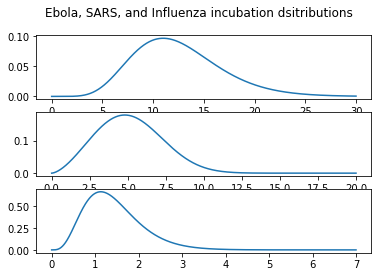

In [3]:
import matplotlib.pyplot as plt

dists_graphs = []
time_range = {'Ebola': np.linspace(0, 30, 10000), 'SARS': np.linspace(0, 20, 10000), 'Influenza': np.linspace(0, 7, 10000)}

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax = {'Ebola': ax1, 'SARS': ax2, 'Influenza': ax3}
fig.suptitle('Ebola, SARS, and Influenza incubation dsitributions')

for dis in diseases:
    ax[dis].plot(time_range[dis], inc_dists[dis].pdf(time_range[dis], **inc_params[dis]))
    
plt.show()

In [4]:
num_people = 100000

# This then gives a rough time scale of some disease of concern establishing and the authorities shutting the border.
# Although we are free to change this

border_shut = [72, 168, 336]

In [5]:
df = pd.DataFrame(columns=['Disease name', 'Incubation distribution', 
                           'Exposure time range (time before flight)',
                           'Flight time range',
                           'Calculated border screening success rate'], index=range(1,28))

In [6]:
for i in range(9):
    fly = flight_ranges[i % 3]
    exp = border_shut[int(np.floor(i / 3))]
                          
    screening = boarder_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.gamma, 
                          time_scale = 'days',
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'shape':8.27054, 'scale':1.51139},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+1] = pd.Series({'Disease name':'Ebola', 
                           'Incubation distribution':'Gamma (shape: 8.27054, scale: 1.51139)',
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Calculated border screening success rate': screening})

In [7]:
for i in range(9):
    fly = flight_ranges[i % 3]
    exp = border_shut[int(np.floor(i / 3))]
                          
    screening = boarder_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.weibull, 
                          time_scale = 'days',
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'c':2.59, 'scale':5.8},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+10] = pd.Series({'Disease name':'SARS', 
                           'Incubation distribution':'Weibull (shape: 2.59, scale: 5.8)',
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Calculated border screening success rate': screening})

In [8]:
for i in range(9):
    fly = flight_ranges[i % 3]
    exp = border_shut[int(np.floor(i / 3))]
                          
    screening = boarder_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.gamma, 
                          time_scale = 'days',
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'shape':2.59, 'scale':5.8},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+19] = pd.Series({'Disease name':'Influenza', 
                           'Incubation distribution':'Gamma (shape: :4.7556, scale:0.3007)',
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Calculated border screening success rate': screening})

In [9]:
df

,Disease name,Incubation distribution,Exposure time range (time before flight),Flight time range,Calculated border screening success rate
1,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 72)","Uniform (3, 5)",8.0008e-05
2,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 72)","Uniform (9, 11)",0.000130008
3,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 72)","Uniform (15, 17)",0.00030003
4,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 168)","Uniform (3, 5)",0.00191606
5,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 168)","Uniform (9, 11)",0.00533106
6,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 168)","Uniform (15, 17)",0.00974892
7,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 336)","Uniform (3, 5)",0.00995153
8,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 336)","Uniform (9, 11)",0.0253487
9,Ebola,"Gamma (shape: 8.27054, scale: 1.51139)","Uniform (0, 336)","Uniform (15, 17)",0.0406479
10,SARS,"Weibull (shape: 2.59, scale: 5.8)","Uniform (0, 72)","Uniform (3, 5)",0.00953671


In [20]:
import os
cd_path = os.getcwd()
save_path = os.path.join(path, 'BorderScreening_VaryingDisease.csv')

df.to_csv(save_path)